In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [9]:
train_data=pd.read_excel('Data_Train.xlsx')
train_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [10]:
df=train_data.copy()

In [11]:
df['Location'].value_counts()

Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64

In [12]:
df['Fuel_Type'].value_counts()

Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64

In [13]:
df['Owner_Type'].value_counts()

First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64

In [14]:
df['Transmission'].value_counts()

Manual       4299
Automatic    1720
Name: Transmission, dtype: int64

In [16]:
df.shape

(6019, 13)

In [15]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [17]:
df.drop('New_Price',1,inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,6019.0,2013.358199,3.269742,1998.00,2011.0,2014.00,2016.00,2019.0
Kilometers_Driven,6019.0,58738.380296,91268.843206,171.00,34000.0,53000.00,73000.00,6500000.0
Seats,5977.0,5.278735,0.808840,0.00,5.0,5.00,5.00,10.0
Price,6019.0,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


In [21]:
# df['Name'].value_counts()

In [22]:
#Data PreProcessing

In [25]:
df=df[df['Kilometers_Driven']<750000]
df=df[df['Kilometers_Driven']>1000]

In [26]:
df=df[df['Fuel_Type']!='Electric']

In [27]:
#Car Age
df['Car_Age']=2020-df['Year']

In [28]:
df.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75,10
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50,5


In [29]:
df['Mileage']=df['Mileage'].apply(lambda x:x.split(' ')[0]).astype(float)

In [32]:
# df['Engine'].unique()

In [34]:
df['Engine']=df['Engine'].apply(lambda x:str(x).split(" ")[0]).astype(float)

In [39]:
# df['Power'].sort_values(ascending=False)

In [40]:
df['Power']=df['Power'].replace('null bhp','0 bhp')

In [42]:
df['Power']=df['Power'].apply(lambda x:str(x).split(" ")[0]).astype(float)

In [43]:
df.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,10
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,5
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,9


In [44]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               36
Power                36
Seats                42
Price                 0
Car_Age               0
dtype: int64

In [47]:
df['Seats'].fillna('5.0',inplace=True)

In [54]:
df['Car_Brand']=df['Name'].apply(lambda x:str(x.lower()).split(' ')[0])

In [55]:
df['Car_Brand'].value_counts()

maruti           1208
hyundai          1105
honda             608
toyota            410
mercedes-benz     318
volkswagen        314
ford              299
mahindra          271
bmw               266
audi              236
tata              184
skoda             172
renault           144
chevrolet         121
nissan             91
land               60
jaguar             39
fiat               28
mitsubishi         27
mini               26
volvo              21
porsche            18
jeep               15
datsun             13
force               3
isuzu               3
bentley             1
ambassador          1
smart               1
lamborghini         1
Name: Car_Brand, dtype: int64

In [56]:
df=df[df['Car_Brand']!='smart']

In [57]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Car_Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5,1.75,10,maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,12.50,5,hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5,4.50,9,honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7,6.00,8,maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5,17.74,7,audi


In [72]:
df['Year'] = df['Year'].astype('str')
df['Location'] = df['Location'].astype('str')
df['Fuel_Type'] = df['Fuel_Type'].astype('str')
df['Transmission'] = df['Transmission'].astype('str')
df['Owner_Type'] = df['Owner_Type'].astype('str')

In [73]:
df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Car_Age              0
Car_Brand            0
dtype: int64

In [74]:
df['Engine'] = df.groupby(['Car_Brand']).transform(lambda x: x.fillna(x.median()))['Engine']
df['Power'] = df.groupby(['Car_Brand']).transform(lambda x: x.fillna(x.median()))['Power']

In [75]:
# df.isnull().sum()

In [76]:
#Now we don't have any Nan Values

In [77]:
df.head(3)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Car_Age,Car_Brand
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5,1.75,10,maruti
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5,12.50,5,hyundai
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5,4.50,9,honda


In [66]:
df.drop('Name',1,inplace=True)

In [78]:
df['Car_Brand'] = df['Car_Brand'].astype('str')

In [82]:
df['Car_Info']=(df['Fuel_Type']+" "+df['Transmission']+" "+df['Owner_Type']+" "+df['Car_Brand'])

In [84]:
# df['Car_Info']

In [85]:
df.drop(['Fuel_Type','Transmission','Owner_Type','Car_Brand'],1,inplace=True)

In [86]:
df.head(3)

,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Car_Age,Car_Info
0,Mumbai,2010,72000,26.60,998.0,58.16,5,1.75,10,CNG Manual First maruti
1,Pune,2015,41000,19.67,1582.0,126.20,5,12.50,5,Diesel Manual First hyundai
2,Chennai,2011,46000,18.20,1199.0,88.70,5,4.50,9,Petrol Manual First honda


In [87]:
df['Car_Info']=df['Car_Info'].apply(lambda x:x.lower())

In [88]:
df.head(3)

,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Car_Age,Car_Info
0,Mumbai,2010,72000,26.60,998.0,58.16,5,1.75,10,cng manual first maruti
1,Pune,2015,41000,19.67,1582.0,126.20,5,12.50,5,diesel manual first hyundai
2,Chennai,2011,46000,18.20,1199.0,88.70,5,4.50,9,petrol manual first honda


In [89]:
X=df.drop('Price',1)
y=df['Price']

In [90]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [91]:
X_train_merged = X_train['Car_Info']
X_train_location = X_train['Location']

X_test_merged = X_test['Car_Info']
X_test_location = X_test['Location']

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [93]:
tf1 = TfidfVectorizer(min_df=3, token_pattern=r'\w{3,}', ngram_range=(1,1), max_df=0.9,stop_words='english')
tf2 = TfidfVectorizer(min_df=2, token_pattern=r'\w{3,}',stop_words='english')

X_train_merged = tf1.fit_transform(X_train_merged)
X_train_location = tf2.fit_transform(X_train_location)

X_test_merged = tf1.transform(X_test_merged)
X_test_location = tf2.transform(X_test_location)

In [94]:
X_train.head()

,Location,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Car_Age,Car_Info
254,Jaipur,2010,83000,19.81,1086.0,68.05,5,10,petrol manual first hyundai
1117,Ahmedabad,2014,34000,20.70,1496.0,113.98,5,6,diesel automatic first mini
3287,Pune,2015,87900,16.00,2179.0,140.00,7,5,diesel manual first mahindra
4289,Bangalore,2011,60000,16.20,1599.0,103.20,5,9,petrol manual first hyundai
5330,Pune,2013,54534,16.95,1197.0,78.90,5,7,petrol automatic first hyundai


In [100]:
X_train['Year']=X_train['Year'].astype(int)
X_test['Year']=X_test['Year'].astype(int)
X_train['Seats']=X_train['Seats'].astype(float)
X_test['Seats']=X_test['Seats'].astype(float)

In [101]:
X_train.dtypes

Location              object
Year                   int32
Kilometers_Driven      int64
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Car_Age                int64
Car_Info              object
dtype: object

In [102]:
from scipy import sparse
from sklearn.preprocessing import StandardScaler

sc1 = StandardScaler()
X_train_Year = sc1.fit_transform(np.array(X_train['Year']).reshape(-1,1))
X_test_Year = sc1.transform(np.array(X_test['Year']).reshape(-1,1))
X_train_Year = sparse.csr_matrix(X_train_Year)
X_test_Year = sparse.csr_matrix(X_test_Year)

sc2 = StandardScaler()
X_train_km = sc2.fit_transform(np.array(X_train['Kilometers_Driven']).reshape(-1,1))
X_test_km = sc2.transform(np.array(X_test['Kilometers_Driven']).reshape(-1,1))
X_train_km = sparse.csr_matrix(X_train_km)
X_test_km = sparse.csr_matrix(X_test_km)

sc3 = StandardScaler()
X_train_mileage = sc3.fit_transform(np.array(X_train['Mileage']).reshape(-1,1))
X_test_mileage = sc3.transform(np.array(X_test['Mileage']).reshape(-1,1))
X_train_mileage = sparse.csr_matrix(X_train_mileage)
X_test_mileage = sparse.csr_matrix(X_test_mileage)

sc4 = StandardScaler()
X_train_Engine = sc4.fit_transform(np.array(X_train['Engine']).reshape(-1,1))
X_test_Engine = sc4.transform(np.array(X_test['Engine']).reshape(-1,1))
X_train_Engine = sparse.csr_matrix(X_train_Engine)
X_test_Engine = sparse.csr_matrix(X_test_Engine)

sc5 = StandardScaler()
X_train_Power = sc5.fit_transform(np.array(X_train['Power']).reshape(-1,1))
X_test_Power = sc5.transform(np.array(X_test['Power']).reshape(-1,1))
X_train_Power = sparse.csr_matrix(X_train_Power)
X_test_Power = sparse.csr_matrix(X_test_Power)

sc6 = StandardScaler()
X_train_Seats = sc6.fit_transform(np.array(X_train['Seats']).reshape(-1,1))
X_test_Seats = sc6.transform(np.array(X_test['Seats']).reshape(-1,1))
X_train_Seats = sparse.csr_matrix(X_train_Seats)
X_test_Seats = sparse.csr_matrix(X_test_Seats)

sc7 = StandardScaler()
X_train_age = sc7.fit_transform(np.array(X_train['Car_Age']).reshape(-1,1))
X_test_age = sc7.transform(np.array(X_test['Car_Age']).reshape(-1,1))
X_train_age = sparse.csr_matrix(X_train_age)
X_test_age = sparse.csr_matrix(X_test_age)

In [103]:
from scipy.sparse import hstack, csr_matrix
merged_train = hstack((X_train_merged, X_train_location,X_train_Year,X_train_km,X_train_mileage,X_train_Engine,X_train_Power,X_train_Seats,X_train_age))
merged_test  = hstack((X_test_merged, X_test_location, X_test_Year,X_test_km,X_test_mileage,X_test_Engine,X_test_Power,X_test_Seats,X_test_age))

In [104]:
merged_train.shape

(4502, 51)

In [105]:
from math import sqrt 
from sklearn.metrics import mean_squared_log_error

In [106]:
import lightgbm as lgb
train_data = lgb.Dataset(merged_train, label=y_train)
test_data = lgb.Dataset(merged_test, label=y_test)

param = {'objective': 'regression',
         'boosting': 'gbdt',  
         'metric': 'l2_root',
         'learning_rate': 0.05, 
         'num_iterations': 1000,
         'num_leaves': 30,
         'max_depth': -1,
         'min_data_in_leaf': 4,
         'bagging_fraction': 0.78,
         'bagging_freq': 1,
         'feature_fraction': 0.65,
         }

lgbm = lgb.train(params=param,
                 verbose_eval=100,
                 early_stopping_rounds=50,
                 train_set=train_data,
                 valid_sets=[test_data])

y_pred_lgbm = lgbm.predict(merged_test)
print('RMSLE:', sqrt(mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred_lgbm))))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003293 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1389
[LightGBM] [Info] Number of data points in the train set: 4502, number of used features: 51
[LightGBM] [Info] Start training from score 9.481859
Training until validation scores don't improve for 50 rounds
[100]	valid_0's rmse: 4.17444
[200]	valid_0's rmse: 4.00252
[300]	valid_0's rmse: 3.97364
Early stopping, best iteration is:
[299]	valid_0's rmse: 3.97172
RMSLE: 3.971717422780068


In [107]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred_lgbm)

0.8823707348107819

In [108]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred_lgbm))

3.971717422780068

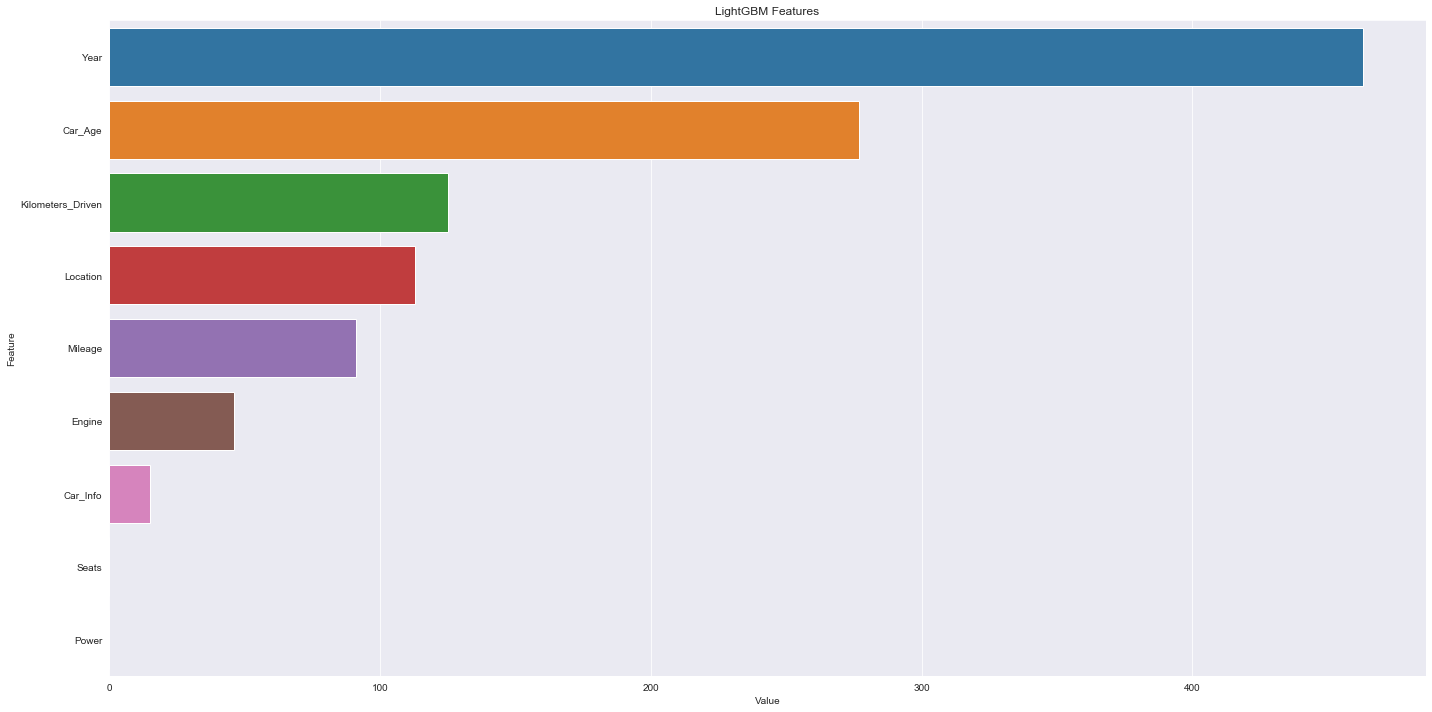

In [109]:
#Most Important Features
feature_imp = pd.DataFrame(sorted(zip(lgbm.feature_importance(), X.columns), reverse=True)[:15], 
                           columns=['Value','Feature'])
plt.figure(figsize=(20, 10))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.tight_layout()
plt.show()

In [ ]:
#Further The Predictions can be made on Test Set...